In [62]:
import pandas as pd
import numpy as np
import verispy, os
from verispy import VERIS
import seaborn as sns

[Source for VERISPY + Useful README](https://github.com/RiskLens/verispy)

In [63]:


DATA_DIR ="./data/validated/"
v = VERIS(json_dir=DATA_DIR, verbose=True)
vdf = v.json_to_df(keep_raw=True)
print(vdf.shape)


Found 8323 json files.
Loading schema
Loading JSON files to DataFrame.


100%|████████████████████████████████████████████████████████████████████████████| 8323/8323 [00:02<00:00, 3150.96it/s]


Finished loading JSON files to dataframe.
Building DataFrame with enumerations.
Building enumeration columns.


100%|████████████████████████████████████████████████████████████████████████████████| 173/173 [00:16<00:00, 10.34it/s]


Done building DataFrame with enumerations.
Post-Processing DataFrame (A4 Names, Victim Industries, Patterns)
Finished building VERIS DataFrame
(8323, 2347)


##### v is a VERIS object. vdf contains the actual data. 

[Good StackOverflow Answer on working with Dataframes vvv](https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values)

(4690, 2347)


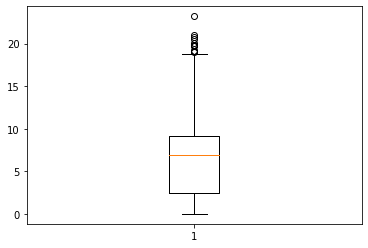

(array([975., 109., 138., 166., 214., 198., 317., 601., 515., 352., 259.,
        172., 129., 104., 102., 105.,  73.,  53.,  48.,  38.,  12.,   6.,
          3.,   0.,   1.]),
 array([ 0.        ,  0.9283269 ,  1.8566538 ,  2.7849807 ,  3.7133076 ,
         4.6416345 ,  5.5699614 ,  6.4982883 ,  7.4266152 ,  8.3549421 ,
         9.28326899, 10.21159589, 11.13992279, 12.06824969, 12.99657659,
        13.92490349, 14.85323039, 15.78155729, 16.70988419, 17.63821109,
        18.56653799, 19.49486489, 20.42319179, 21.35151869, 22.27984559,
        23.20817249]),
 <a list of 25 Patch objects>)

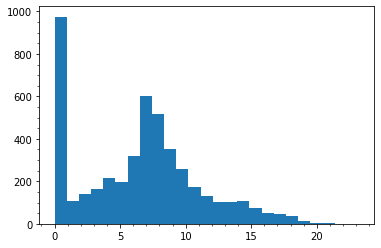

In [84]:
import matplotlib.pyplot as plt
vdf.rename(columns={'attribute.confidentiality.data_total': 'records_lost'}, inplace=True)
vdf
vdf_loss = vdf.dropna(subset=["records_lost"])
plt.boxplot(np.log(vdf_loss["records_lost"]))
print(vdf_loss.shape)
plt.show()
plt.minorticks_on()
plt.hist(np.log(vdf_loss["records_lost"]), bins = 25)
    

Total Records Breached, Log Normalized

               enum     x       n     freq
0       Over 100000   916  3424.0  0.26752
1     1001 to 10000   692  3424.0  0.20210
2       101 to 1000   507  3424.0  0.14807
3         11 to 100   358  3424.0  0.10456
4           1 to 10   267  3424.0  0.07798
5    10001 to 25000   214  3424.0  0.06250
6             Small   184  3424.0  0.05374
7             Large   137  3424.0  0.04001
8    25001 to 50000    98  3424.0  0.02862
9   50001 to 100000    51  3424.0  0.01489
10          Unknown  1266     NaN      NaN


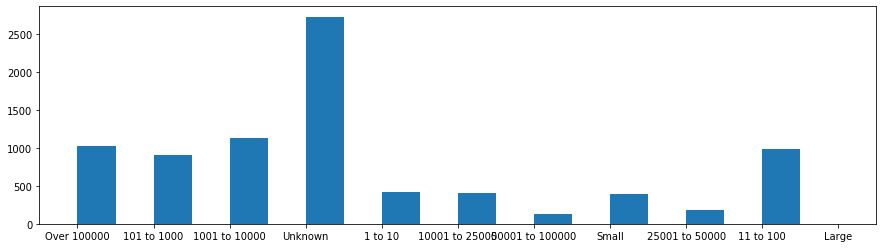

In [92]:

plt.figure(figsize=(15,4))
plt.hist(v.raw_df['victim.employee_count'], width = .5)
print(v.enum_summary(vdf_loss, 'victim.employee_count'))

plt.show()
# vdf_loss.assign(employee_count=vdf_loss['victim.employee_count.1 to 10'])

In [15]:
df_final = df_action.iloc[:, :7]
df_bugs = vdf_loss[vdf_loss['action.Hacking'] | vdf_loss['action.Malware']]
# print(df_bugs.shape)



NameError: name 'df_action' is not defined

In [13]:
indices = list(df_bugs.index)
bugs = [False] * df_final.shape[0]
for i in indices:
    bugs[i] = True

NameError: name 'df_bugs' is not defined

In [82]:
df_final['action.Bugs'] = bugs
df_final


,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Bugs
0,False,False,False,False,True,False,False,False
1,False,True,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False
4,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...
4685,False,True,False,False,False,False,False,False
4686,False,False,False,False,False,True,False,False
4687,False,False,True,False,False,False,False,True
4688,False,False,False,False,False,True,False,False


In [9]:
#Creates a smaller table for ease of running
# N = 1000
# sample = np.random.choice(8323, N)
# df_short = df_final.iloc[sample,:].reset_index().iloc[:,1:]


# Maybe we should id the column here in the future so we can refer to the original table values

In [10]:
# impactful_df = vdf[vdf['impact.overall_rating.Insignificant'] | vdf['impact.overall_rating.Distracting'] | vdf['impact.overall_rating.Painful'] | vdf['impact.overall_rating.Catastrophic'] | vdf['impact.overall_rating.Damaging']].reindex()
# reset_impactful_df = impactful_df.reset_index(drop=True) #Resets the indicies
# impactful_df_bugs = reset_impactful_df[reset_impactful_df['action.Hacking'] | reset_impactful_df['action.Malware']]
# impactful_df_bugs


,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Unknown,action.environmental.notes,action.environmental.variety.Deterioration,...,victim.revenue.iso_currency_code.XPF,victim.revenue.iso_currency_code.YER,victim.revenue.iso_currency_code.ZAR,victim.revenue.iso_currency_code.ZMK,victim.revenue.iso_currency_code.ZWD,victim.secondary.amount,victim.secondary.notes,victim.secondary.victim_id,victim.state,victim.victim_id
1,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,CA,Uber
5,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,US-MI,Adrian College
6,False,False,True,False,False,False,True,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,US-IA,Virginia Gay Hospital
7,False,False,False,True,False,False,False,False,NaN,False,...,False,False,False,False,False,1.0,The dentist offices who were compromised could...,[Digital Dental Record],US-WI,PerCSoft
13,False,False,True,True,False,False,True,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,CA-ON,Michael Garron Hospital
14,False,False,True,False,True,True,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,WI,Brinks Security
17,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,NaN,Society of Information Risk Analysts
18,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,VA,"Albemarle County, VA"
20,False,False,False,True,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,US-CT,Wolcott school district
23,False,False,True,False,False,False,False,False,NaN,False,...,False,False,False,False,False,NaN,NaN,NaN,US-KY,Elmcroft Senior Living


In [11]:
indices = list(impactful_df_bugs.index)
bugs = [False] * impactful_df.shape[0]
for i in indices:
    bugs[i] = True
overall_rating = reset_impactful_df.loc[:, reset_impactful_df.columns.str.startswith('impact.overall_rating')]
df_final = reset_impactful_df.iloc[:, :7]
df_final['action.Bugs'] = bugs
result = pd.concat([df_final,overall_rating], axis=1, sort=False)
result = result.iloc[:,:13]
result 

,action.Environmental,action.Error,action.Hacking,action.Malware,action.Misuse,action.Physical,action.Social,action.Bugs,impact.overall_rating.Catastrophic,impact.overall_rating.Damaging,impact.overall_rating.Distracting,impact.overall_rating.Insignificant,impact.overall_rating.Painful
0,False,True,False,False,False,False,False,False,False,True,False,False,False
1,False,False,True,False,False,False,False,True,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,True,False,False,False,False,False,True
4,False,True,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,False,False,True,False,False,False,True,True,False,False,False,False,True
112,False,False,True,False,False,False,False,True,False,False,True,False,False
113,False,False,False,False,False,False,True,False,False,False,True,False,False
114,False,False,False,True,False,False,False,True,False,False,False,False,True


In [13]:
#result['outcome'] 

#imp_name = "impact.overall_rating"
#result.apply(outcome: lambda outcome + 1, axis = 1)
#idxs = range(len(result))
#for i in idxs:
#    for rank in ranking.keys():
#        if result.[i][rank]:
#            print(rank) = 
#     for 
#             print result[rank]
# ranking

In [1]:
# impact = [0] * result.shape[0]
# for i in range(result.shape[0]):
#     if(result.loc[i, 'impact.overall_rating.Insignificant']):
#         impact[i] = 1
#     elif(result.loc[i, 'impact.overall_rating.Distracting']):
#         impact[i] = 2
#     elif(result.loc[i, 'impact.overall_rating.Painful']):
#         impact[i] = 3
#     elif(result.loc[i, 'impact.overall_rating.Damaging']):
#         impact[i] = 4
#     elif(result.loc[i, 'impact.overall_rating.Catastrophic']):
#         impact[i] = 5
# result['action.Impact'] = impact #Impact rating column is named 'action.Impact'
# result = result.loc[:, result.columns.str.startswith('action')] #CURRENT FINAL DATAFRAME
# result
# import matplotlib.pyplot as plt
# plt.hist(result["action.Impact"])

In [2]:
import numpy as np
import pandas as pd
import logging

import dowhy
from dowhy.do_why import CausalModel
import dowhy.datasets, dowhy.plotter 

ModuleNotFoundError: No module named 'dowhy'

In [ ]:
import sys
print(sys.version)

In [ ]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_samples=10000,
        treatment_is_binary=True)
df = data["df"]
df

In [ ]:
#Create causal model with instrumental
model = CausalModel(
    data = result,
    treatment = 'action.Bugs',
    outcome = 'records_lost',
    graph = './NetworkXTest/test.gml',
    logging_level = logging.INFO
)
#model.view_model(layout="dot")

In [ ]:
model.view_model()

In [ ]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

We get a causal graph. Now identification and estimation is done. 

In [ ]:
identified_estimand = model.identify_effect()
print(identified_estimand)

In [ ]:
estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression")
print("Causal Estimate is " + str(estimate.value))

# Plot Slope of line between treamtent and outcome =causal effect
dowhy.plotter.plot_causal_effect(estimate, result['action.Bugs'], result['action.Impact'])
# I think the issue is our data isn't giving us a linear plot... this is linear regression after all

In [ ]:
print("DoWhy estimate is " + str(estimate.value))
rvar = 1 if np.random.uniform() >0.5 else 0
print ("Actual true causal effect was {0}".format(rvar))

In [ ]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

## Method 1: Stratification

In [ ]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)
print("Causal Estimate is " + str(causal_estimate.value))

## Method 2: Matching

In [ ]:
causal_estimate_match = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching")
print(causal_estimate_match)
print("Causal Estimate is " + str(causal_estimate_match.value))